## Exploratory Data Analysis and Statistics using Pandas and Matplotlib

###0. Preliminary plotting stuff to get things going

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as colors

In [2]:
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

###0. Preliminaries about Python

In working with python I always remember: a python is a duck.

What I mean is, python has a certain way of doing things. For example lets call one of these ways listiness. Listiness works on lists, dictionaries, files, and a general notion of something called an iterator.

But first, lets introduce the notion of a comprehension. Its a way of constructing a list

In [3]:
alist=[1,2,3,4,5]
asquaredlist=[i*i for i in alist]
asquaredlist

[1, 4, 9, 16, 25]

Python has some nifty functions like `enumerate` and `zip`.

In [4]:
enumerate(asquaredlist)

Thats a strange type. But its really a duck.

In [5]:
[k for k in enumerate(asquaredlist)]

[(0, 1), (1, 4), (2, 9), (3, 16), (4, 25)]

This next one is very usefil in combining lists together...

In [6]:
zip(alist, asquaredlist)

[(1, 1), (2, 4), (3, 9), (4, 16), (5, 25)]

Open files behave like lists too!

In [7]:
linelengths=[len(line) for line in open("olive.csv")]
print linelengths

[88, 49, 49, 48, 48, 49, 48, 48, 49, 49, 50, 50, 50, 50, 49, 49, 50, 49, 50, 49, 49, 50, 49, 50, 50, 50, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 46, 47, 47, 47, 47, 47, 47, 47, 46, 47, 47, 47, 47, 46, 46, 46, 47, 46, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 46, 47, 47, 47, 52, 51, 52, 51, 51, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 52, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 52, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 52, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 52, 53, 53, 53, 53, 53, 52, 52, 53, 53, 53, 53, 53, 53, 53, 52, 52, 53, 53, 52, 53, 53, 52, 53, 53, 52, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53,

And so do dictionaries. But know what you are accessing

In [8]:
adict={'one':1, 'two': 2, 'three': 3}
print [i for i in adict], [(k,v) for k,v in adict.items()], adict.values()

['three', 'two', 'one'] [('three', 3), ('two', 2), ('one', 1)] [3, 2, 1]


`xrange` is another duck!

In [9]:
mylist=[]
for i in xrange(10):
    mylist.append(i)
mylist

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

From python 2.7 onwards you can construct dictionaries using dictionary comprehensions:

In [10]:
{k:v for (k,v) in zip(alist, asquaredlist)}

{1: 1, 2: 4, 3: 9, 4: 16, 5: 25}

### YOUR TURN NOW (5 minutes)

create a dictionary with keys the integers upto and including 10, and values the cubes of these dictionaries

In [11]:
#your code here
thelist=range(11)
{k:v for (k,v) in zip(thelist, [i*i*i for i in thelist])}

{0: 0,
 1: 1,
 2: 8,
 3: 27,
 4: 64,
 5: 125,
 6: 216,
 7: 343,
 8: 512,
 9: 729,
 10: 1000}

###1. The Olive Oils dataset

Some of the following text is taken from the rggobi book (http://www.ggobi.org/book/). It is an excellent book on visualization and EDA for classification, and is available freely as a pdf from Hollis for those with a Harvard Id. Even though the book uses ggobi, a lot of the same analysis can be done in Mondrian or directly in Matplotlib/Pandas (albeit not interactively).

<hr/>

"The Olive Oils data has eight explanatory variables (levels of fatty acids in the oils) and nine classes (areas of Italy). The goal of the analysis is to develop rules that reliably distinguish oils from the nine different areas. It is a problem of practical interest, because oil from some areas is more highly valued and unscrupulous suppliers sometimes make false claims about the origin of their oil. The content of the oils is a subject of study in its own right: Olive oil has high nutritional value, and some of its constituent fatty acids are considered to be more beneficial than others."

In addition, fatty acid contents vary with climate: this information is important in deciding which varieties to grow where.



"Source: Forina, M., Armanino, C., Lanteri, S. & Tiscornia, E. (1983), Classification of Olive Oils from their Fatty Acid Composition, in Martens, H. and
Russwurm Jr., H., eds, Food Research and Data Analysis, Applied Science
Publishers, London, pp. 189–214. It was brought to our attention by Glover
& Hopke (1992).

Number of rows: 572

Number of variables: 10

Description: This data consists of the percentage composition of fatty acids
found in the lipid fraction of Italian olive oils. The data arises from a study
to determine the authenticity of an olive oil."
<hr/>

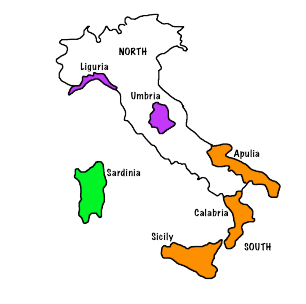

In [12]:
from IPython.display import Image
Image(filename='Italy.png')

In working with pandas and matplotlib I dont always remember the syntax. A programmer is a good tool for converting Stack Overflow snippets into code. I almost always put what I am trying to do into google and go from there. 

That said, I found the following links very useful in understanding the Pandas mode, how things work.

* http://blog.yhathq.com/posts/R-and-pandas-and-what-ive-learned-about-each.html
* http://www.bearrelroll.com/2013/05/python-pandas-tutorial/
* http://manishamde.github.io/blog/2013/03/07/pandas-and-python-top-10/

###2. Loading and Cleaning

Let's load the olive oil dataset into a pandas dataframe and have a look at the first 5 rows.

In [13]:
df=pd.read_csv("olive.csv")
df.head(5)

,Unnamed: 0,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,5.North-Apulia,1,1,1051,67,259,7771,672,50,80,46


Let's rename that ugly first column. 

*Hint*: A Google search for 'python pandas dataframe rename' points you at this <a href="http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.rename.html">documentation</a>.

In [14]:
print df.columns
df.rename(columns={df.columns[0]:'areastring'}, inplace=True)
df.columns

Index([Unnamed: 0, region, area, palmitic, palmitoleic, stearic, oleic, linoleic, linolenic, arachidic, eicosenoic], dtype=object)


Index([areastring, region, area, palmitic, palmitoleic, stearic, oleic, linoleic, linolenic, arachidic, eicosenoic], dtype=object)

Let's explore. Which unique regions and areas are contained in the dataset?

In [15]:
print 'regions\t', df.region.unique()
print 'areas\t', df.area.unique()

regions	[1 2 3]
areas	[1 2 3 4 5 6 9 7 8]


Let's create a *crosstab*ulation or contingency table of the factors.

*Hint*: A Google search for 'python pandas cross tabulation' points you at this <a href="http://pandas.pydata.org/pandas-docs/stable/reshaping.html#cross-tabulations">documentation</a>.


In [16]:
pd.crosstab(df.area, df.region)

region,1,2,3
area,,,
1,25,0,0
2,56,0,0
3,206,0,0
4,36,0,0
5,0,65,0
6,0,33,0
7,0,0,50
8,0,0,50
9,0,0,51


Do we need to clean the dataset before we can explore it a little more? Let's have a look.

In [17]:
df.head()

,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,5.North-Apulia,1,1,1051,67,259,7771,672,50,80,46


Let's get rid of the junk numbering in `df.areastring`. For single column Pandas Series we use `map`. Here's the <a href="http://pandas.pydata.org/pandas-docs/dev/generated/pandas.Series.map.html">documentation</a>.

In [18]:
df.areastring=df.areastring.map(lambda x: x.split('.')[-1])
df.head()

,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,North-Apulia,1,1,1051,67,259,7771,672,50,80,46


To access a specific subset of columns of a dataframe, we can use list indexing.

In [19]:
df[['palmitic','oleic']].head()

,palmitic,oleic
0,1075,7823
1,1088,7709
2,911,8113
3,966,7952
4,1051,7771


Notice that this returns a new object of type DataFrame.

To access the series of entries of a single column, we could do the following.

In [20]:
print df['palmitic']

0     1075
1     1088
2      911
3      966
4     1051
5      911
6      922
7     1100
8     1082
9     1037
10    1051
11    1036
12    1074
13     875
14     952
...
557    1010
558    1020
559    1120
560    1090
561    1100
562    1090
563    1150
564    1110
565    1010
566    1070
567    1280
568    1060
569    1010
570     990
571     960
Name: palmitic, Length: 572, dtype: int64


Notice the difference in the syntax. In the first example where we used list indexing we got a new DataFrame. In the second example we got a series corresponding to the column. 

In [21]:
print "type of df[['palmitic']]:\t", type(df[['palmitic']]) 
print "type of df['palmitic']:\t\t", type(df['palmitic'])

type of df[['palmitic']]:	<class 'pandas.core.frame.DataFrame'>
type of df['palmitic']:		<class 'pandas.core.series.Series'>


To access the series of values of a single column more conveniently, we can do this:

In [22]:
df.palmitic

0     1075
1     1088
2      911
3      966
4     1051
5      911
6      922
7     1100
8     1082
9     1037
10    1051
11    1036
12    1074
13     875
14     952
...
557    1010
558    1020
559    1120
560    1090
561    1100
562    1090
563    1150
564    1110
565    1010
566    1070
567    1280
568    1060
569    1010
570     990
571     960
Name: palmitic, Length: 572, dtype: int64

### YOUR TURN NOW (10 minutes)

Get the unique areastrings of the dataframe `df`.

In [23]:
#your code here

df.areastring.unique()

array(['North-Apulia', 'Calabria', 'South-Apulia', 'Sicily',
       'Inland-Sardinia', 'Coast-Sardinia', 'Umbria', 'East-Liguria',
       'West-Liguria'], dtype=object)

Create a new dataframe `dfsub` by taking the list of acids and using pandas' `apply` function to divide all values by 100.

If you're not familiar with pandas' `apply` function, a Google search for 'python pandas dataframe apply' points you to the <a href="http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.apply.html">documentation</a>

In [24]:
acidlist=['palmitic', 'palmitoleic', 'stearic', 'oleic', 'linoleic', 'linolenic', 'arachidic', 'eicosenoic']

#your code here

dfsub=df[acidlist].apply(lambda x: x/100.0)
dfsub.head()

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
3,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
4,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46


Notice that we can replace part of the dataframe by this new frame. Since we need the percentages, let's do this. The `Oleic` percentages should be in the 70s and 80s if you did this right.

In [25]:
df[acidlist]=dfsub
df.head()

,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,North-Apulia,1,1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,North-Apulia,1,1,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
3,North-Apulia,1,1,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
4,North-Apulia,1,1,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46


In [26]:
df.palmitic.mean(), df.palmitic.std(), df.palmitic.var()

(12.317412587412583, 1.6859226405632937, 2.8423351499639087)

In [27]:
df.palmitic.std(), np.sqrt(df.palmitic.var())

(1.6859226405632937, 1.6859226405632937)

In [28]:
np.std(df.palmitic), np.mean(df.palmitic), np.var(df.palmitic)

(1.6844482872943494, 12.317412587412583, 2.837366032568867)

In [29]:
np.sqrt(np.var(df.palmitic))

1.6844482872943494

In [30]:
df[acidlist].corr()

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
palmitic,1.000000,0.835605,-0.170392,-0.837335,0.460684,0.319327,0.228299,0.501952
palmitoleic,0.835605,1.000000,-0.222185,-0.852438,0.621627,0.093112,0.085481,0.416350
stearic,-0.170392,-0.222185,1.000000,0.113599,-0.197817,0.018917,-0.040979,0.140377
oleic,-0.837335,-0.852438,0.113599,1.000000,-0.850318,-0.218171,-0.319962,-0.424146
linoleic,0.460684,0.621627,-0.197817,-0.850318,1.000000,-0.057439,0.210973,0.089045
linolenic,0.319327,0.093112,0.018917,-0.218171,-0.057439,1.000000,0.620236,0.578319
arachidic,0.228299,0.085481,-0.040979,-0.319962,0.210973,0.620236,1.000000,0.328663
eicosenoic,0.501952,0.416350,0.140377,-0.424146,0.089045,0.578319,0.328663,1.000000


In [31]:
df[acidlist].cov()

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
palmitic,2.842335,0.739522,-0.105556,-5.728752,1.885769,0.069818,0.084793,0.119180
palmitoleic,0.739522,0.275566,-0.042857,-1.815928,0.792300,0.006339,0.009886,0.030781
stearic,-0.105556,-0.042857,0.135019,0.169392,-0.176485,0.000901,-0.003317,0.007264
oleic,-5.728752,-1.815928,0.169392,16.468194,-8.378221,-0.114820,-0.286050,-0.242406
linoleic,1.885769,0.792300,-0.176485,-8.378221,5.895146,-0.018086,0.112848,0.030448
linolenic,0.069818,0.006339,0.000901,-0.114820,-0.018086,0.016819,0.017720,0.010563
arachidic,0.084793,0.009886,-0.003317,-0.286050,0.112848,0.017720,0.048533,0.010197
eicosenoic,0.119180,0.030781,0.007264,-0.242406,0.030448,0.010563,0.010197,0.019834


In [32]:
df[acidlist].median(), df[acidlist].mean()

(palmitic       12.010
palmitoleic     1.100
stearic         2.230
oleic          73.025
linoleic       10.300
linolenic       0.330
arachidic       0.610
eicosenoic      0.170
dtype: float64,
 palmitic       12.317413
palmitoleic     1.260944
stearic         2.288654
oleic          73.117483
linoleic        9.805280
linolenic       0.318881
arachidic       0.580979
eicosenoic      0.162815
dtype: float64)

###3. Quick Intro to Numpy and Matplotlib

This is just a quick and dirty intro. Please read the excellent tutorials <a href="http://nbviewer.ipython.org/urls/raw.github.com/jrjohansson/scientific-python-lectures/master/Lecture-2-Numpy.ipynb">here</a> and <a href="http://nbviewer.ipython.org/urls/raw.github.com/jrjohansson/scientific-python-lectures/master/Lecture-4-Matplotlib.ipynb">here</a>.

####Lets start with numpy

In [33]:
v = np.array([1,2,3,4])
v.shape, type(v)

((4,), numpy.ndarray)

In [34]:
v

array([1, 2, 3, 4])

In [35]:
v.T

array([1, 2, 3, 4])

In [36]:
for j in v:
    print j

1
2
3
4


In [37]:
M = np.array([[1, 2], [3, 4]])
M

array([[1, 2],
       [3, 4]])

In [38]:
M.T

array([[1, 3],
       [2, 4]])

In [39]:
type(M), M.shape

(numpy.ndarray, (2, 2))

In [40]:
M32=np.array([[1,2],[3,4],[5,6]])
M32

array([[1, 2],
       [3, 4],
       [5, 6]])

In [41]:
M32.shape

(3, 2)

In [42]:
M23=M32.T
M23

array([[1, 3, 5],
       [2, 4, 6]])

In [43]:
M23.shape

(2, 3)

In [44]:
df.palmitic.values

array([ 10.75,  10.88,   9.11,   9.66,  10.51,   9.11,   9.22,  11.  ,
        10.82,  10.37,  10.51,  10.36,  10.74,   8.75,   9.52,  11.55,
         9.43,  12.78,   9.61,   9.52,  10.74,   9.95,  10.56,  10.65,
        10.65,  13.15,  13.21,  13.59,  13.78,  12.95,  12.75,  13.36,
        13.09,  13.4 ,  12.99,  12.21,  12.45,  12.85,  12.48,  13.56,
        12.6 ,  12.61,  13.04,  13.44,  13.23,  12.92,  12.54,  13.12,
        12.13,  13.59,  12.66,  12.98,  12.72,  12.78,  11.84,  13.82,
        11.83,  12.61,  11.98,  12.25,  13.39,  11.32,  13.81,  14.09,
        13.06,  13.72,  13.36,  14.01,  13.9 ,  14.32,  14.12,  13.66,
        13.83,  12.83,  12.96,  12.87,  13.51,  12.41,  12.67,  12.35,
        12.55,  14.54,  13.47,  13.64,  14.1 ,  13.84,  14.12,  14.1 ,
        15.09,  13.17,  12.86,  12.73,  14.63,  13.99,  14.13,  13.69,
        14.88,  13.23,  13.11,  12.86,  13.8 ,  13.94,  13.24,  12.9 ,
        13.61,  13.87,  13.69,  13.03,  13.46,  13.69,  13.05,  13.51,
      

In [45]:
df[['palmitic', 'palmitoleic']].values

array([[ 10.75,   0.75],
       [ 10.88,   0.73],
       [  9.11,   0.54],
       ..., 
       [ 10.1 ,   0.9 ],
       [  9.9 ,   1.2 ],
       [  9.6 ,   0.8 ]])

In [46]:
np.zeros(10)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [47]:
np.ones(10).reshape(5,2)

array([[ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.]])

In [48]:
myrandom=np.random.rand(5,3)
print myrandom

[[ 0.60571577  0.96331786  0.08026468]
 [ 0.83948942  0.1862239   0.41950517]
 [ 0.40459675  0.83930556  0.36429582]
 [ 0.25566242  0.76715174  0.1165785 ]
 [ 0.467922    0.07205632  0.68896321]]


In [49]:
myrandom[0], myrandom[-1], myrandom[0][0]

(array([ 0.60571577,  0.96331786,  0.08026468]),
 array([ 0.467922  ,  0.07205632,  0.68896321]),
 0.60571576967511886)

In [50]:
myrandom[:,0]

array([ 0.60571577,  0.83948942,  0.40459675,  0.25566242,  0.467922  ])

In [51]:
myrandom[0,:]

array([ 0.60571577,  0.96331786,  0.08026468])

### YOUR TURN NOW (5 minutes)

Reshape myrandom into 15 rows of 1 column

In [52]:
#your code here
myrandom.reshape(-1,1)

array([[ 0.60571577],
       [ 0.96331786],
       [ 0.08026468],
       [ 0.83948942],
       [ 0.1862239 ],
       [ 0.41950517],
       [ 0.40459675],
       [ 0.83930556],
       [ 0.36429582],
       [ 0.25566242],
       [ 0.76715174],
       [ 0.1165785 ],
       [ 0.467922  ],
       [ 0.07205632],
       [ 0.68896321]])

####Moving on to matplotlib

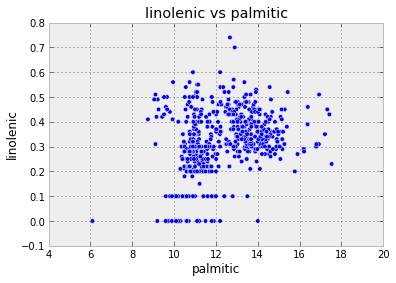

In [53]:
fig=plt.figure()
plt.scatter(df.palmitic, df.linolenic)
axis = fig.gca() #get current axis
axis.set_title('linolenic vs palmitic')
axis.set_xlabel('palmitic')
axis.set_ylabel('linolenic')
#ax can be got with fig.gca()

(array([  1,   0,  11,  71, 188,  79, 131,  73,   9,   9]),
 array([  6.1  ,   7.243,   8.386,   9.529,  10.672,  11.815,  12.958,
        14.101,  15.244,  16.387,  17.53 ]),
 <a list of 10 Patch objects>)

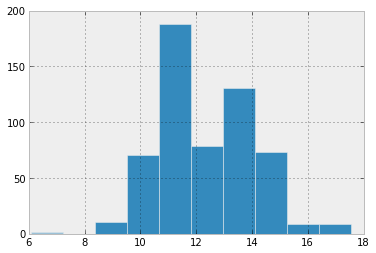

In [54]:
plt.hist(df.palmitic)

There are many many more kinds of plots.

A more object oriented approach sees us using the `subplots` function to set both figure and axis.

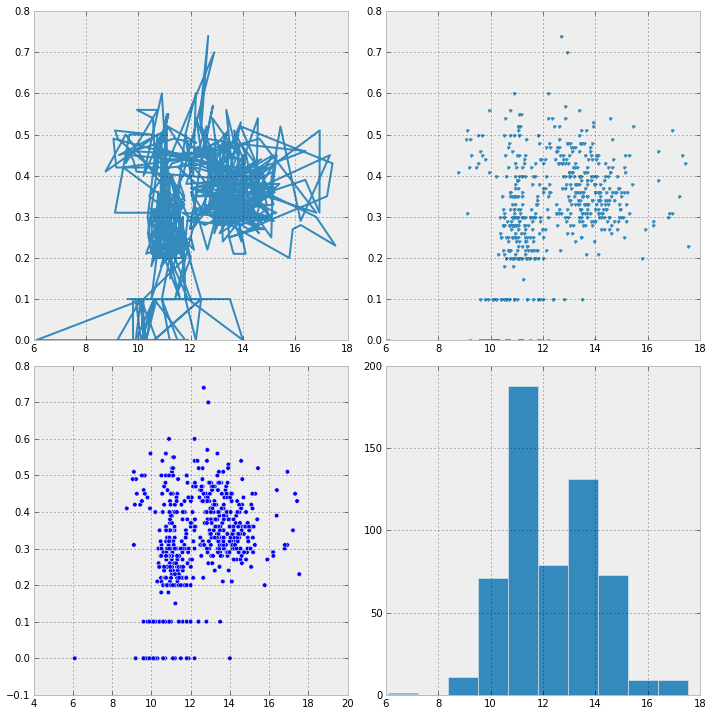

In [55]:
fig, axes=plt.subplots(figsize=(10,10), nrows=2, ncols=2)
axes[0][0].plot(df.palmitic, df.linolenic)
axes[0][1].plot(df.palmitic, df.linolenic, '.')
axes[1][0].scatter(df.palmitic, df.linolenic)
axes[1][1].hist(df.palmitic)
fig.tight_layout()

###YOUR TURN NOW (10 minutes)

Make scatterplots of the acids in the list `yacids` against the acids in the list `xacids`. As the names suggest, plot the acids in `yacids` along the y axis and the acids in `xacids` along the x axis. Label the axes with the respective acid name. Set it up as a grid with 3 rows and 2 columns.

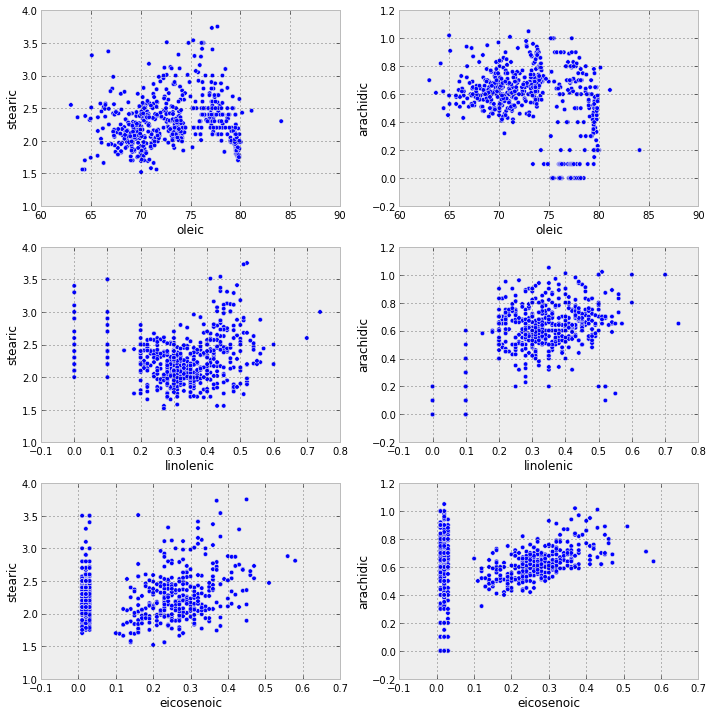

In [56]:
xacids=['oleic','linolenic','eicosenoic']
yacids=['stearic','arachidic']

#your code here
fig, axes=plt.subplots(figsize=(10,10), nrows=len(xacids), ncols=len(yacids))
for i, xacid in enumerate(xacids):
    for j, yacid in enumerate(yacids):
        axes[i][j].scatter(df[xacid],df[yacid])
        axes[i][j].set_xlabel(xacid)
        axes[i][j].set_ylabel(yacid)
fig.tight_layout()

###4. Pandas Data Munging

The first concept we deal with here is pandas `groupby`. The idea is to group a dataframe by the values of a particular factor variable. The documentation can be found <a href="http://pandas.pydata.org/pandas-docs/dev/groupby.html">here</a>.

In [57]:
region_groupby = df.groupby('region')
print type(region_groupby)
region_groupby.head()

<class 'pandas.core.groupby.DataFrameGroupBy'>


areastring  region  area  palmitic  palmitoleic  stearic  oleic  linoleic  linolenic  arachidic  eicosenoic
region                                                                                                                      
1      0       North-Apulia       1     1     10.75         0.75     2.26  78.23      6.72       0.36       0.60        0.29
       1       North-Apulia       1     1     10.88         0.73     2.24  77.09      7.81       0.31       0.61        0.29
       2       North-Apulia       1     1      9.11         0.54     2.46  81.13      5.49       0.31       0.63        0.29
       3       North-Apulia       1     1      9.66         0.57     2.40  79.52      6.19       0.50       0.78        0.35
       4       North-Apulia       1     1     10.51         0.67     2.59  77.71      6.72       0.50       0.80        0.46
2      323  Inland-Sardinia       2     5     11.29         1.20     2.22  72.72     11.12       0.43       0.98        0.02
       324  Inland-Sardinia       2     5     10.42         1.35     2.10  73.76     11.16       0.35       0.90        0.03
       325  Inland-Sardinia       2     5     11.03         0.96     2.10  73.80     10.85       0.32       0.94        0.03
       326  Inland-Sardinia       2     5     11.18         0.97     2.21  72.79     11.54       0.35       0.94        0.02
       327  Inland-Sardinia       2     5     10.52         0.95     2.15  73.88     11.26       0.31       0.92        0.01
3      421           Umbria       3     9     10.85         0.70     1.80  79.55      6.05       0.20       0.50        0.01
       422           Umbria       3     9     10.85         0.70     1.85  79.55      6.00       0.25       0.55        0.01
       423           Umbria       3     9     10.90         0.60     1.90  79.50      6.00       0.28       0.47        0.02
       424           Umbria       3     9     10.80         0.65     1.89  79.60      6.02       0.35       0.20        0.01
       425           Umbria       3     9     10.90         0.60     1.95  79.55      6.00       0.28       0.42        0.02

The function `groupby` gives you a dictionary-like object, with the keys being the values of the factor, and the values being the corresponding subsets of the dataframe.

In [58]:
for key, value in region_groupby:
    print "( key, type(value) ) = (", key, ",", type(value), ")"
    v=value

v.head()

( key, type(value) ) = ( 1 , <class 'pandas.core.frame.DataFrame'> )
( key, type(value) ) = ( 2 , <class 'pandas.core.frame.DataFrame'> )
( key, type(value) ) = ( 3 , <class 'pandas.core.frame.DataFrame'> )


,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
421,Umbria,3,9,10.85,0.70,1.80,79.55,6.05,0.20,0.50,0.01
422,Umbria,3,9,10.85,0.70,1.85,79.55,6.00,0.25,0.55,0.01
423,Umbria,3,9,10.90,0.60,1.90,79.50,6.00,0.28,0.47,0.02
424,Umbria,3,9,10.80,0.65,1.89,79.60,6.02,0.35,0.20,0.01
425,Umbria,3,9,10.90,0.60,1.95,79.55,6.00,0.28,0.42,0.02


The `groupby` function also acts like an object that can be **mapped**. After the mapping is complete, the rows are put together (**reduced**) into a larger dataframe. For example, using the `describe` function. The documentation of the `describe` function can be found <a href="http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.describe.html">here</a>.

In [59]:
dfrd=region_groupby.describe()
print type(dfrd)
dfrd.head(20)

<class 'pandas.core.frame.DataFrame'>


region        area    palmitic  palmitoleic     stearic       oleic    linoleic   linolenic   arachidic  eicosenoic
region                                                                                                                           
1      count     323  323.000000  323.000000   323.000000  323.000000  323.000000  323.000000  323.000000  323.000000  323.000000
       mean        1    2.783282   13.322879     1.548019    2.287740   71.000093   10.334985    0.380650    0.631176    0.273220
       std         0    0.741054    1.529349     0.507237    0.398709    3.451431    2.106730    0.079727    0.111644    0.083915
       min         1    1.000000    8.750000     0.350000    1.520000   63.000000    4.480000    0.200000    0.320000    0.100000
       25%         1    2.500000   12.680000     1.215000    2.015000   68.830000    8.555000    0.320000    0.560000    0.220000
       50%         1    3.000000   13.460000     1.630000    2.230000   70.300000   10.900000    0.370000    0.620000    0.270000
       75%         1    3.000000   14.190000     1.850000    2.495000   72.835000   12.025000    0.440000    0.690000    0.320000
       max         1    4.000000   17.530000     2.800000    3.750000   81.130000   14.620000    0.740000    1.020000    0.580000
2      count      98   98.000000   98.000000    98.000000   98.000000   98.000000   98.000000   98.000000   98.000000   98.000000
       mean        2    5.336735   11.113469     0.967449    2.261837   72.680204   11.965306    0.270918    0.731735    0.019388
       std         0    0.475023    0.404111     0.138514    0.176363    1.418783    1.072336    0.053844    0.118826    0.007436
       min         2    5.000000   10.300000     0.350000    1.990000   68.820000   10.570000    0.150000    0.450000    0.010000
       25%         2    5.000000   10.852500     0.882500    2.120000   71.372500   11.122500    0.230000    0.660000    0.010000
       50%         2    5.000000   11.075000     0.960000    2.220000   73.255000   11.465000    0.270000    0.720000    0.020000
       75%         2    6.000000   11.372500     1.040000    2.395000   73.810000   13.065000    0.300000    0.810000    0.020000
       max         2    6.000000   12.130000     1.350000    2.720000   74.390000   14.700000    0.430000    1.050000    0.030000
3      count     151  151.000000  151.000000   151.000000  151.000000  151.000000  151.000000  151.000000  151.000000  151.000000
       mean        3    8.006623   10.948013     0.837351    2.308013   77.930530    7.270331    0.217881    0.375762    0.019735
       std         0    0.820542    0.825635     0.264388    0.389560    1.648155    1.431226    0.168865    0.293586    0.007298
       min         3    7.000000    6.100000     0.150000    1.700000   73.400000    5.100000    0.000000    0.000000    0.010000

So, one may iterate through the groupby 'dictionary', get the pandas series from each sub-dataframe, and compute the standard deviation using the `std` function (find documentation of `std` <a href="http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.std.html">here</a>):

In [60]:
vecs=[]
keys=[]
for key, value in region_groupby:
    k=key
    v=value.std()
print k, type(v), v

3 <class 'pandas.core.series.Series'> region         0.000000
area           0.820542
palmitic       0.825635
palmitoleic    0.264388
stearic        0.389560
oleic          1.648155
linoleic       1.431226
linolenic      0.168865
arachidic      0.293586
eicosenoic     0.007298
dtype: float64


Or one might let pandas take care of concatenating the series obtained by running `std` on each dataframe back into a dataframe for us. Notice that the output dataframe is automatically indexed by region for us!

In [61]:
dfbystd=df.groupby('region').std()
dfbystd.head()

,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,
1,0.741054,1.529349,0.507237,0.398709,3.451431,2.106730,0.079727,0.111644,0.083915
2,0.475023,0.404111,0.138514,0.176363,1.418783,1.072336,0.053844,0.118826,0.007436
3,0.820542,0.825635,0.264388,0.389560,1.648155,1.431226,0.168865,0.293586,0.007298


Or one can use `aggregate` to pass an arbitrary function of to the sub-dataframe. The function is applied columnwise.

In [62]:
dfbymean=region_groupby.aggregate(np.mean)
dfbymean.head()

,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,
1,2.783282,13.322879,1.548019,2.287740,71.000093,10.334985,0.380650,0.631176,0.273220
2,5.336735,11.113469,0.967449,2.261837,72.680204,11.965306,0.270918,0.731735,0.019388
3,8.006623,10.948013,0.837351,2.308013,77.930530,7.270331,0.217881,0.375762,0.019735


In [63]:
region_groupby.aggregate(lambda x: x.palmitic.sum()) #probably not what u had in mind :-)

,areastring,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,,
1,4303.29,4303.29,4303.29,4303.29,4303.29,4303.29,4303.29,4303.29,4303.29,4303.29
2,1089.12,1089.12,1089.12,1089.12,1089.12,1089.12,1089.12,1089.12,1089.12,1089.12
3,1653.15,1653.15,1653.15,1653.15,1653.15,1653.15,1653.15,1653.15,1653.15,1653.15


Or one can use `apply` to pass an arbitrary function to the sub-dataframe. This one takes the dataframe as argument.

In [64]:
region_groupby.apply(lambda f: f.mean())

,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,,
1,1,2.783282,13.322879,1.548019,2.287740,71.000093,10.334985,0.380650,0.631176,0.273220
2,2,5.336735,11.113469,0.967449,2.261837,72.680204,11.965306,0.270918,0.731735,0.019388
3,3,8.006623,10.948013,0.837351,2.308013,77.930530,7.270331,0.217881,0.375762,0.019735


In [65]:
region_groupby.apply(lambda f: f.palmitic.mean())

region
1         13.322879
2         11.113469
3         10.948013
dtype: float64

Let's rename the columns in `dfbymean` and `dfbystd`.

In [66]:
renamedict_std={k:k+"_std" for k in acidlist}
renamedict_mean={k:k+"_mean" for k in acidlist}
dfbystd.rename(inplace=True, columns=renamedict_std)
dfbymean.rename(inplace=True, columns=renamedict_mean) 
dfbystd.head()

,area,palmitic_std,palmitoleic_std,stearic_std,oleic_std,linoleic_std,linolenic_std,arachidic_std,eicosenoic_std
region,,,,,,,,,
1,0.741054,1.529349,0.507237,0.398709,3.451431,2.106730,0.079727,0.111644,0.083915
2,0.475023,0.404111,0.138514,0.176363,1.418783,1.072336,0.053844,0.118826,0.007436
3,0.820542,0.825635,0.264388,0.389560,1.648155,1.431226,0.168865,0.293586,0.007298


Pandas can do general merges. When we do that along an index, it's called a `join` (<a href="http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.join.html">documentation</a>). Here we make two sub-dataframes and join them on the common region index.

In [67]:
dfpalmiticmean = dfbymean[['palmitic_mean']] 
dfpalmiticstd = dfbystd[['palmitic_std']] 

newdfbyregion=dfpalmiticmean.join(dfpalmiticstd)
newdfbyregion.head()

,palmitic_mean,palmitic_std
region,,
1,13.322879,1.529349
2,11.113469,0.404111
3,10.948013,0.825635


### YOUR TURN NOW (10 minutes)

Let's weight the palmitic acids content by a random weight. We'll first extract a subset of columns from `df` and then you will write a function to weigh the palmitic content by this random weight, delivering a weighted palmitic mean in the final dataframe.

In [68]:
df.shape

(572, 11)

In [69]:
weights=np.random.uniform(size=df.shape[0])
smallerdf=df[['palmitic']]
otherdf=df[['region']]
otherdf['weight'] = weights
otherdf.head()

,region,weight
0,1,0.898430
1,1,0.080806
2,1,0.767620
3,1,0.581654
4,1,0.285011


Join `smallerdf` and `otherdf` on the index, into smallerdf

In [70]:
#your code here
smallerdf=smallerdf.join(otherdf)
smallerdf.head()

,palmitic,region,weight
0,10.75,1,0.898430
1,10.88,1,0.080806
2,9.11,1,0.767620
3,9.66,1,0.581654
4,10.51,1,0.285011


Now lets use these weights to compute a weighted average over the palmitic column.

In [71]:
#your code here
def wfunc(f):
    return (f.palmitic*f.weight).sum()/f.weight.sum()
smallerdf.groupby('region').apply(wfunc)

region
1         13.260523
2         11.114971
3         10.954050
dtype: float64

Finally aggregate the column percentages by summing them up over the regions.

In [72]:
#your code here

def myfunc(column):
    return np.sum(column)
    
region_groupby.aggregate(myfunc)

,areastring,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,,
1,North-ApuliaNorth-ApuliaNorth-ApuliaNorth-Apul...,899,4303.29,500.01,738.94,22933.03,3338.20,122.95,203.87,88.25
2,Inland-SardiniaInland-SardiniaInland-SardiniaI...,523,1089.12,94.81,221.66,7122.66,1172.60,26.55,71.71,1.90
3,UmbriaUmbriaUmbriaUmbriaUmbriaUmbriaUmbriaUmbr...,1209,1653.15,126.44,348.51,11767.51,1097.82,32.90,56.74,2.98


### 5. One Dimensional Exploratory Data Analysis (EDA) with Pandas

In [73]:
rkeys=[1,2,3]
rvals=['South','Sardinia','North']
rmap={e[0]:e[1] for e in zip(rkeys,rvals)}
rmap

{1: 'South', 2: 'Sardinia', 3: 'North'}

Let's get a dataframe with just the acids.

In [74]:
mdf2=df.groupby('region').aggregate(np.mean)
mdf2=mdf2[acidlist]
mdf2.head()

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,
1,13.322879,1.548019,2.287740,71.000093,10.334985,0.380650,0.631176,0.273220
2,11.113469,0.967449,2.261837,72.680204,11.965306,0.270918,0.731735,0.019388
3,10.948013,0.837351,2.308013,77.930530,7.270331,0.217881,0.375762,0.019735


Let's make a bar plot of the relative mean percentages of the acids. In pandas this is as simple as:

(0, 100)

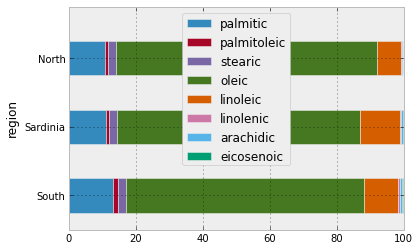

In [75]:
ax=mdf2.plot(kind='barh', stacked=True)
ax.set_yticklabels(rvals)
ax.set_xlim([0,100])

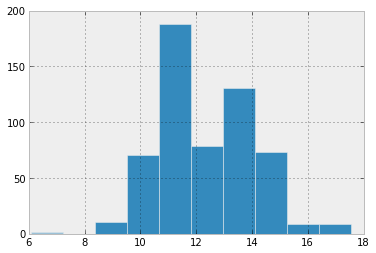

In [76]:
df.palmitic.hist()

The above graph get's proportions of all the acids in each region. We can ask the opposite question: for each acid, what's the distribution of regions?

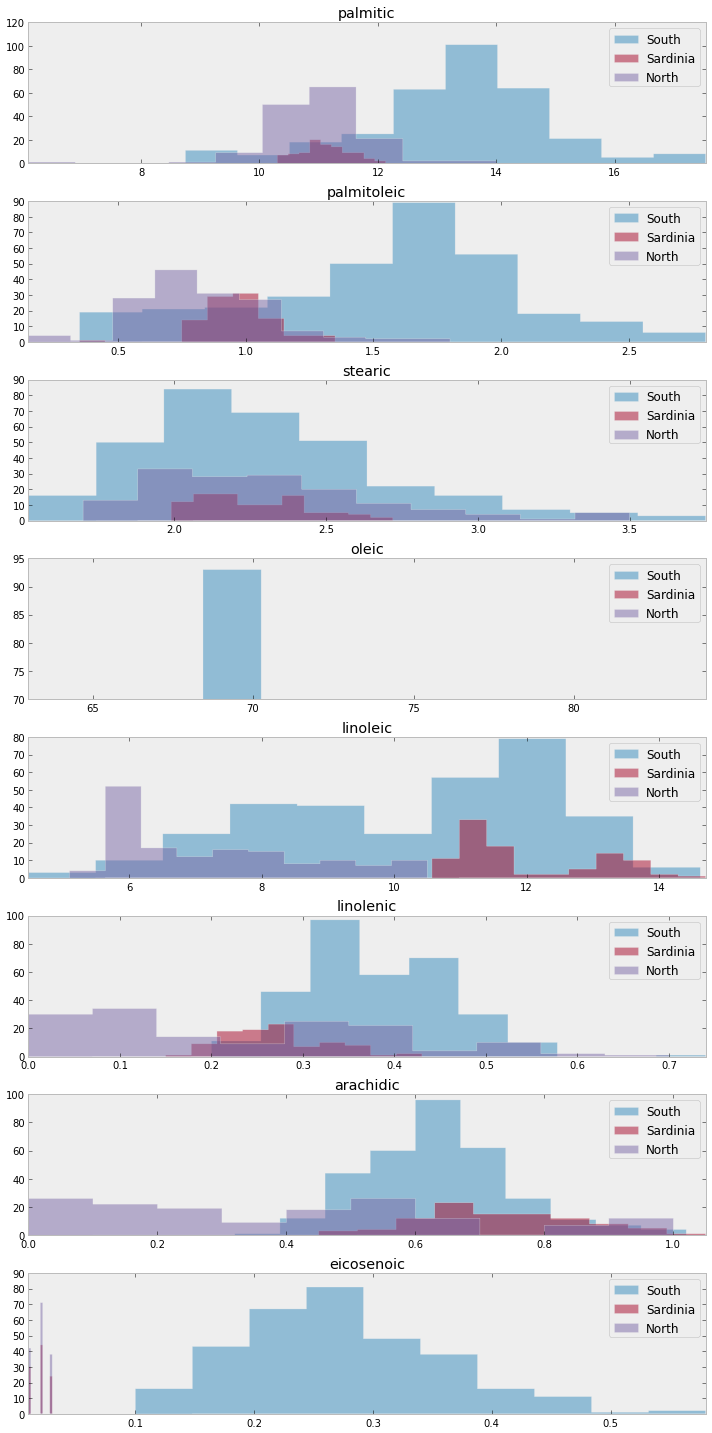

In [77]:
fig, axes=plt.subplots(figsize=(10,20), nrows=len(acidlist), ncols=1)
i=0
for ax in axes.flatten():
    acid=acidlist[i]
    seriesacid=df[acid]#get the Pandas series
    minmax=[seriesacid.min(), seriesacid.max()]
    for k,g in df.groupby('region'):
        style = {'histtype':'stepfilled', 'alpha':0.5, 'label':rmap[k], 'ax':ax}
        g[acid].hist(**style)
        ax.set_xlim(minmax)
        ax.set_title(acid)
        ax.grid(False)
    #construct legend
    ax.legend()
    i=i+1
fig.tight_layout()


You can make a mask!

In [78]:
mask=(df.eicosenoic < 0.05)
mask

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
...
557    True
558    True
559    True
560    True
561    True
562    True
563    True
564    True
565    True
566    True
567    True
568    True
569    True
570    True
571    True
Name: eicosenoic, Length: 572, dtype: bool

The first gives a count, the second is a shortcut to get a probability!

In [79]:
np.sum(mask), np.mean(mask)

(249, 0.43531468531468531)

Pandas supports conditional indexing: <a href="http://pandas.pydata.org/pandas-docs/dev/indexing.html#boolean-indexing">documentation</a>

In [80]:
loweico=df[df.eicosenoic < 0.02]
pd.crosstab(loweico.area, loweico.region)

region,2,3
area,,
5,19,0
6,11,0
7,0,17
8,0,11
9,0,14


### YOUR TURN NOW (10 minutes)

You can see that oleic dominates, and doesn't let us see much about the other acids. Remove it and let's draw bar plots again.

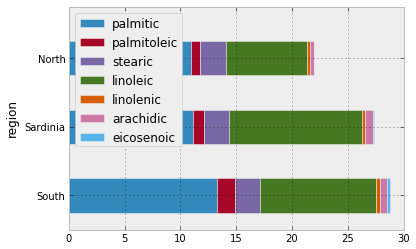

In [81]:
acidlistminusoleic=['palmitic', 'palmitoleic', 'stearic', 'linoleic', 'linolenic', 'arachidic', 'eicosenoic']
#your code here

ax=region_groupby.aggregate(np.mean)[acidlistminusoleic].plot(kind="barh", stacked=True)
ax.set_yticklabels(rvals);

**Note that there are no eicosenoic acids in regions 2 and 3, which are Sardinia and the North respectively**

###6. Two-dimensional EDA with Pandas

Let's write code to scatterplot acid against acid color coded by region. A more polished version is in the appendix

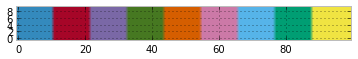

In [82]:
# just do the boxplot without the marginals to split the north out
mycolors=['#348ABD', '#A60628', '#7A68A6', '#467821','#D55E00',  '#CC79A7', 
           '#56B4E9', '#009E73', '#F0E442']
cmap=colors.ListedColormap(mycolors)
a=np.outer(np.arange(0,1,0.01),np.ones(10))
plt.imshow(a.T, cmap=cmap, origin="lower");

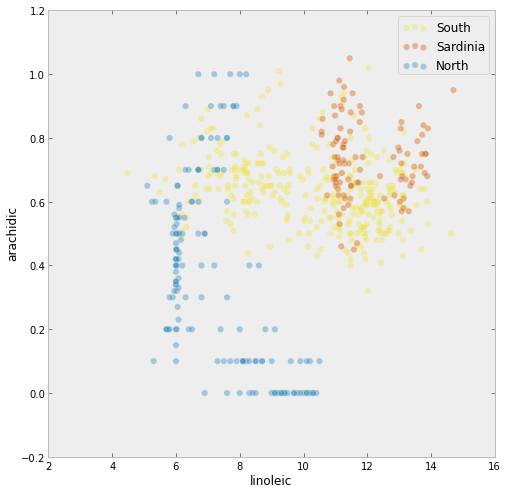

In [83]:
def make2d_eda(df, scatterx, scattery, by="region", labeler={}):
    figure=plt.figure(figsize=(8,8))
    ax=plt.gca()
    cs=list(np.linspace(0,1,len(df.groupby(by))))
    xlimsd={}
    ylimsd={}
    xs={}
    ys={}
    for k,g in df.groupby(by):
        col=cs.pop()
        x=g[scatterx]
        y=g[scattery]
        c=cmap(col)
        ax.scatter(x, y, c=c, label=labeler.get(k,k), s=40, alpha=0.4);
        xlimsd[k]=ax.get_xlim()
        ylimsd[k]=ax.get_ylim()
    xlims=[min([xlimsd[k][0] for k in xlimsd]), max([xlimsd[k][1] for k in xlimsd])]
    ylims=[min([ylimsd[k][0] for k in ylimsd]), max([ylimsd[k][1] for k in ylimsd])]
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    ax.set_xlabel(scatterx)
    ax.set_ylabel(scattery)
    ax.grid(False)
    return ax
a=make2d_eda(df, "linoleic","arachidic", labeler=rmap)
a.legend(loc='upper right');

**A nonlinear, or even marginally linear classifier could separate the north from Sardinia!**

We use the really ugly trellis rplot interface in Pandas to do some hierarchical digging. We plot oleic against linoleic. **We can split Sardinia. We might be able to split East Liguria out but there could be significant misclassification.**

['North-Apulia' 'Calabria' 'South-Apulia' 'Sicily' 'Inland-Sardinia'
 'Coast-Sardinia' 'Umbria' 'East-Liguria' 'West-Liguria']


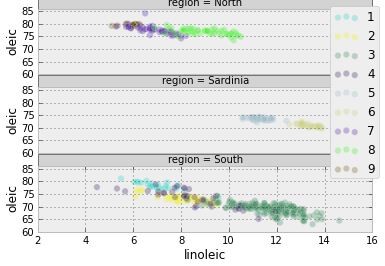

In [84]:
import pandas.tools.rplot as rplot
dfcopy=df.copy()
dfcopy['region']=dfcopy['region'].map(rmap)
imap={e[0]:e[1] for e in zip (df.area.unique(), df.areastring.unique())}
#dfcopy['area']=dfcopy['area'].map(imap)
plot = rplot.RPlot(dfcopy, x='linoleic', y='oleic');
plot.add(rplot.TrellisGrid(['region', '.']))
plot.add(rplot.GeomPoint(size=40.0, alpha=0.3, colour=rplot.ScaleRandomColour('area')));

fig=plot.render()
print df.areastring.unique()


### YOUR TURN NOW (10 minutes)

Plot palmitoleic against palimitic. **What can you separate?** Use the `dfcopy` dataframe.

['North-Apulia' 'Calabria' 'South-Apulia' 'Sicily' 'Inland-Sardinia'
 'Coast-Sardinia' 'Umbria' 'East-Liguria' 'West-Liguria']


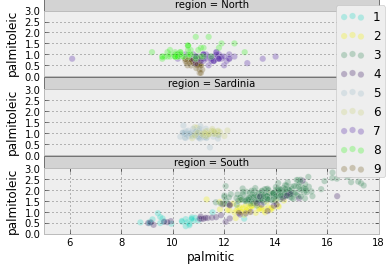

In [85]:
#your code here

plot = rplot.RPlot(dfcopy, x='palmitic', y='palmitoleic');
plot.add(rplot.TrellisGrid(['region', '.']))
plot.add(rplot.GeomPoint(size=40.0, alpha=0.3, colour=rplot.ScaleRandomColour('area')));
fig=plot.render()
print dfcopy.areastring.unique()

### 7. Probability and  Probability distributions

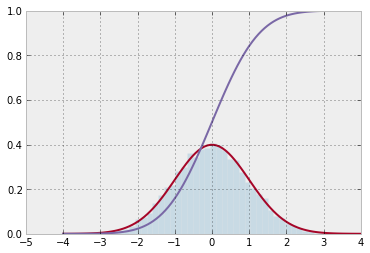

In [86]:
import scipy.stats as stats
mu=0.
sigma=1.
#samples=np.random.normal(mu, sigma, 10000)
#plt.hist(samples,bins=25, alpha=0.4, normed=True)
nd=stats.norm()
plt.hist(nd.rvs(size=10000), bins=50, alpha=0.2,normed=True)
x=np.linspace(-4.0,4.0,100)
plt.plot(x,nd.pdf(x))
plt.plot(x,nd.cdf(x))

In [87]:
mean = [0,0]
cov = [[1,0],[0,5]] # diagonal covariance, points lie on x or y-axis
m=300
nrvs = np.random.multivariate_normal(mean,cov,(m,m))
duets=nrvs.reshape(m*m,2)
print duets[:,1]
normaldf=pd.DataFrame(dict(x=duets[:,0], y=duets[:,1]))
normaldf.head()


[ 0.82677998 -2.57502866 -0.54373457 ...,  2.52301228  1.82248631
 -0.01212415]


,x,y
0,-0.137712,0.826780
1,-0.536308,-2.575029
2,-1.406899,-0.543735
3,-1.178543,-1.069987
4,0.968659,-4.567722


<matplotlib.colorbar.Colorbar instance at 0x10901bb90>

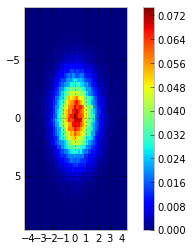

In [88]:
H, xedges, yedges = np.histogram2d(normaldf.x, normaldf.y, bins=(50, 50), normed=True)
extent = [xedges[0], xedges[-1], yedges[-1], yedges[0]]
plt.imshow(H, extent=extent, interpolation='nearest')
plt.colorbar()

### 8. Miscellaneous Pandas Plotting tools: scatters, boxplots, and parallel co-ordinates

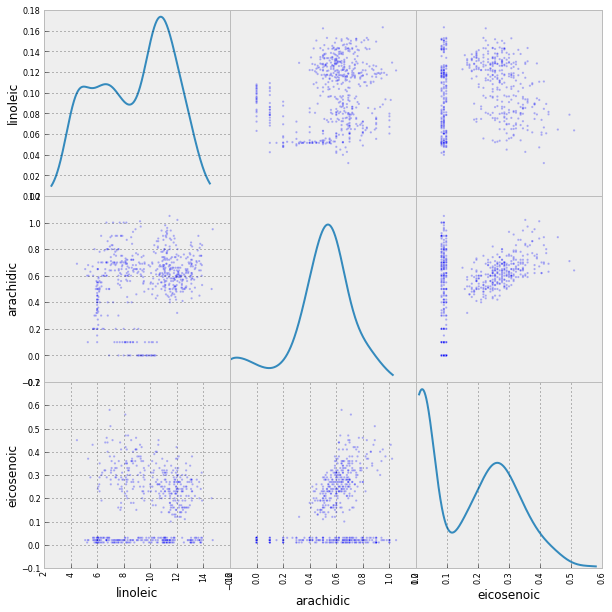

In [89]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df[['linoleic','arachidic','eicosenoic']], alpha=0.3, figsize=(10, 10), diagonal='kde');

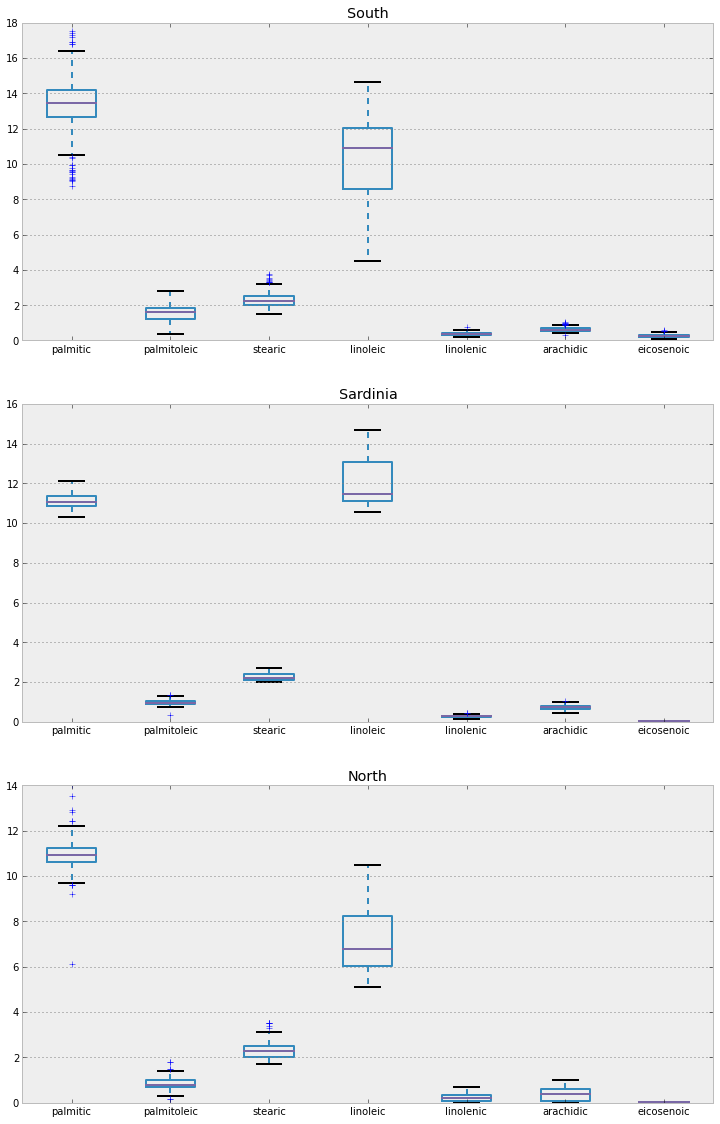

In [90]:
plt.figure(figsize=(12,20))
for key, group in df.groupby('region'):
    plt.subplot(int('31'+str(key)))
    group[acidlistminusoleic].boxplot(grid=False)
    ax=plt.gca()
    ax.set_title(rvals[key-1])
    ax.grid(axis="y", color="gray", linestyle=':', lw=1)


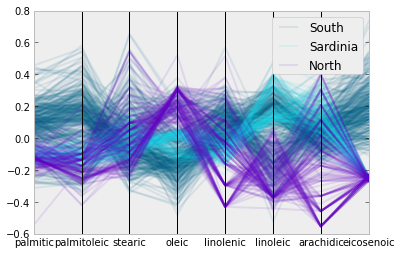

In [91]:
from pandas.tools.plotting import parallel_coordinates
dfna=df[['region', 'palmitic', 'palmitoleic', 'stearic', 'oleic', 'linolenic', 'linoleic', 'arachidic', 'eicosenoic']]
dfna_norm = (dfna - dfna.mean()) / (dfna.max() - dfna.min())
dfna_norm['region']=df['region'].map(lambda x: rmap[x])
parallel_coordinates(dfna_norm, 'region', alpha=0.1)